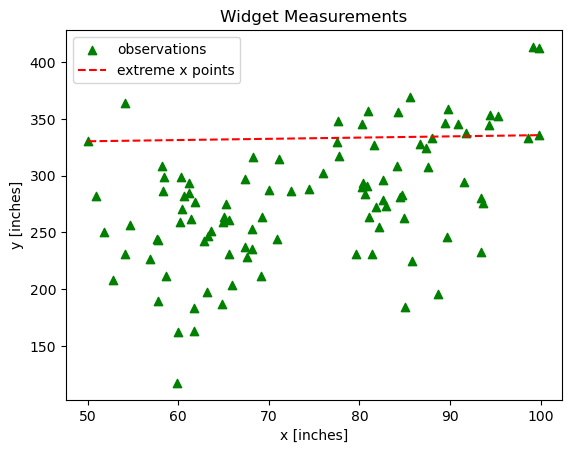

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv('scatter_data.csv', comment='%')
x = data.iloc[:,0]
y = data.iloc[:,1]
plt.scatter(x, y, color='green', marker='^', label='observations')
min_x = min(x)
max_x = max(x)
plt.plot([min_x, max_x], [y[x.idxmin()], y[x.idxmax()]], 'r--', label='extreme x points')
plt.title('Scatter Plot with a Line')
plt.xlabel('x [inches]')
plt.ylabel('y [inches]')
plt.title('Widget Measurements')
plt.legend()
plt.show()


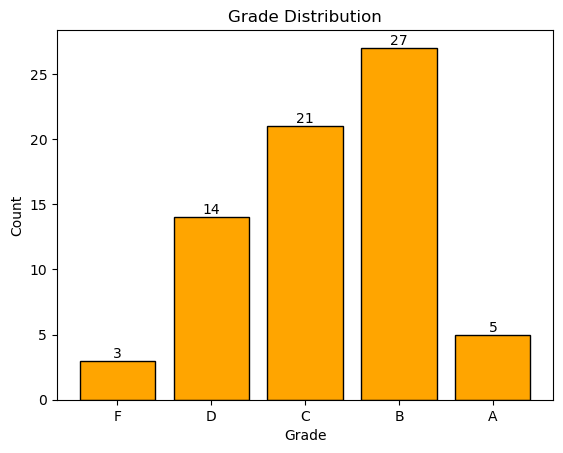

In [31]:
grades_data = pd.read_csv('student_grades.csv', comment='%')
scores = grades_data.iloc[:, 1]
bins = [0,60, 70, 80, 90, 100]
grade_labels = ['F','D','C','B','A']

binned_scores =np.digitize(scores,bins)-1
grade_counts = [(binned_scores == i).sum() for i in range (len(grade_labels))]

bars = plt.bar(grade_labels, grade_counts, edgecolor='black', color='orange')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), 
             ha='center', va='bottom')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Grade Distribution')
plt.show()

/var/folders/xz/2krvblhn4kvgp_gjk5k_mx3h0000gn/T/ipykernel_3833/3864485169.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heuristic_data['Optimality Gap'] = heuristic_data.apply(


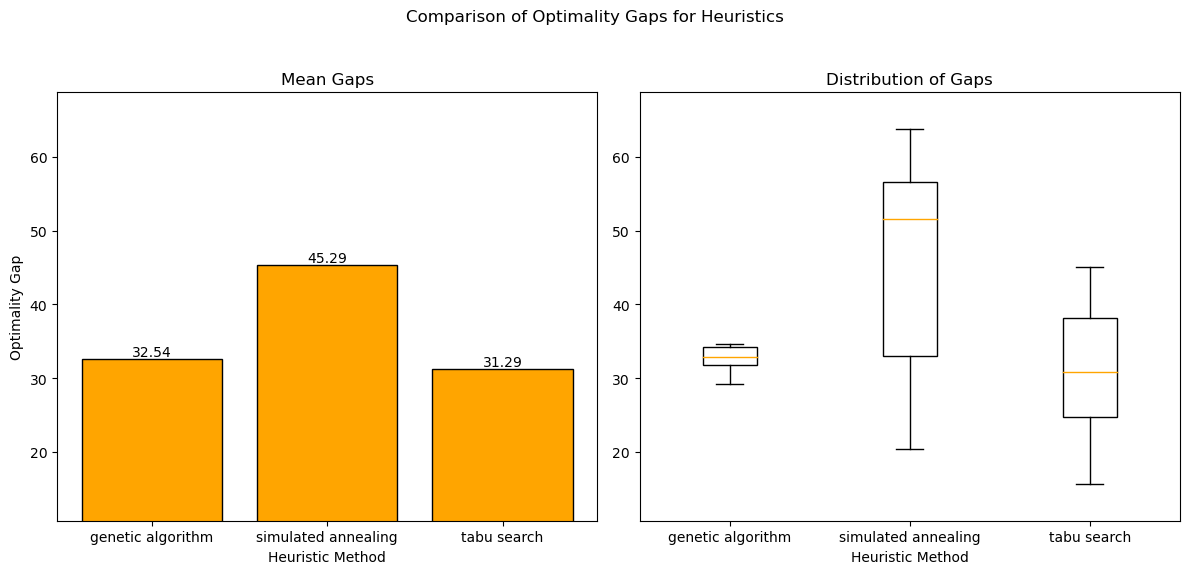

In [36]:
data = pd.read_csv('solution_data.csv', comment='%')
optimal_data = data[data.iloc[:, 1] == 'optimal']
heuristic_data = data[data.iloc[:,1] != 'optimal']
optimal_values = optimal_data.set_index(data.columns[0])[data.columns[2]]
heuristic_data['Optimality Gap'] = heuristic_data.apply(
    lambda row: 100 * (optimal_values[row[data.columns[0]]] - row[data.columns[2]]) /
    optimal_values[row[data.columns[0]]], axis=1)

average_gaps = heuristic_data.groupby(data.columns[1])['Optimality Gap'].mean()
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].bar(average_gaps.index, average_gaps.values, color='orange', edgecolor='black')
ax[0].set_title('Mean Gaps')
ax[0].set_xlabel('Heuristic Method')
ax[0].set_ylabel('Optimality Gap')
ax[0].set_ylim(0, 60)
for index, value in enumerate(average_gaps):
    ax[0].text(index, value, f'{value:.2f}', ha='center', va='bottom')
gaps_data = [group['Optimality Gap'].values for _, group in heuristic_data.groupby(data.columns[1])]

ax[1].boxplot(gaps_data, patch_artist=True, medianprops={'color':'orange'}, boxprops=dict(facecolor='white', edgecolor='black'))
ax[1].set_title('Distribution of Gaps')
ax[1].set_xticklabels(average_gaps.index)
ax[1].set_xlabel('Heuristic Method')
ax[1].set_ylim(0, 60)
ymin = min(heuristic_data.loc[:,'Optimality Gap'].min(), average_gaps.min()) - 5  
ymax = max(heuristic_data.loc[:,'Optimality Gap'].max(), average_gaps.max()) + 5  
ax[0].set_ylim(ymin, ymax)
ax[1].set_ylim(ymin, ymax)
fig.suptitle('Comparison of Optimality Gaps for Heuristics')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  
plt.show()

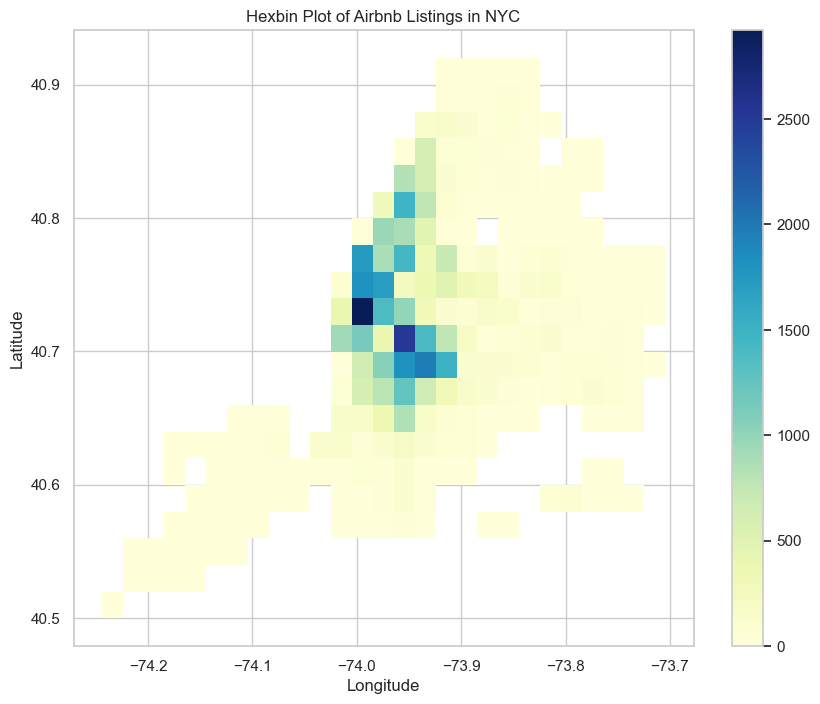

In [5]:
import seaborn as sns
data = pd.read_csv('AB_NYC_2019.csv')
plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")
sns.histplot(data=data, x="longitude", y="latitude", cbar=True, cmap="YlGnBu", binwidth=0.02)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Hexbin Plot of Airbnb Listings in NYC")
plt.show()


In [15]:
#https://seaborn.pydata.org/examples/hexbin_marginals.html
#https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data
#Explanation:
#Creating a Matplotlib figure with a specified size of 10 inches width and 8 inches height
#Setting the style to whitegrid that provides a white background with grid lines
#Creating a hexbin plot using seaborn hisplot
#where the parametres gioes like (data = data) is dataframe
#(x='longitude',y='latitude') which sets data from the dataframe of these columns
#cbar=True willmake seaborn to include color in the plot
#cmap="YlGnBu sets the plot to yellow green blue colormap
#binwidth=0.02 sets the bandwidth of the bins
# setting x-label and y-label as longitude and latitude and title as Hexbin Plot of Airbnb Listings in NYC
#Finally we will display the plot
#Summary:
#I'll create a hexbin plot to visualize the distribution of Airbnb listings in New York City. Specifically, I'll plot the latitude and longitude of the listings using hexagonal bins. This will allow us to see areas with high listing density more clearly.